In [1]:
# imports and defaults
import pandas as pd  
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

import path_weighting as pw
import cn_derivations as cn

pd.options.display.max_rows = 14
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

In [2]:
header_list = ["Time", "Cn2", "CT2", "H_convection", "crosswind",
               "sigCrosswind", "pressure", "temp", "humidity", "pathLength",
               "pathHeight", "correctCn2EO", "correctCn2Sat", "correctCn2Cov",
               "mndCounter", "<XA>(c)", "<YA>(c)", "nSigXA(c)", "nSigYA(c)",
               "corXAYA(c)", "numDgnValid", "numDgnValidCrosswind",
               "numDgnTotal", "channelFlagsCombined", "error"]

scint_data = pd.read_csv("../data/SRun/2018-05-06.mnd", header=None,
                            skiprows=35, names=header_list, sep="\t")

# Remove timestamp fluff
scint_data["Time"] = scint_data["Time"].str.replace("PT00H00M59S/", "")
scint_data["Time"] = scint_data["Time"].str.replace("PT00H00M29S/", "")

scint_data['Time'] = pd.to_datetime(scint_data['Time'])

scint_data = scint_data.set_index("Time")
scint_data = scint_data[scint_data["error"] ==0]
scint_data

,Cn2,CT2,H_convection,crosswind,sigCrosswind,pressure,temp,humidity,pathLength,pathHeight,...,<XA>(c),<YA>(c),nSigXA(c),nSigYA(c),corXAYA(c),numDgnValid,numDgnValidCrosswind,numDgnTotal,channelFlagsCombined,error
Time,,,,,,,,,,,,,,,,,,,,,
2018-05-06 03:53:00+00:00,7.185600e-16,0.000989,17.6,1.05,0.32,939.8,20.8,40,1056,33.05,...,16120.7,13913.4,0.008139,0.008251,0.083,2,2,2,0,0
2018-05-06 03:54:00+00:00,7.530800e-16,0.001037,18.2,1.22,0.05,939.8,20.8,40,1056,33.05,...,16097.2,13894.3,0.007546,0.008124,-0.050,2,2,2,0,0
2018-05-06 03:55:00+00:00,5.909700e-16,0.000814,15.2,1.23,0.07,939.8,20.8,40,1056,33.05,...,16120.8,13919.6,0.007329,0.007526,0.082,2,2,2,0,0
2018-05-06 03:56:00+00:00,7.901700e-16,0.001088,18.9,1.15,0.14,939.8,20.8,40,1056,33.05,...,16062.0,13863.6,0.008034,0.008591,0.021,2,2,2,0,0
2018-05-06 03:57:00+00:00,6.238500e-16,0.000859,15.8,1.21,0.08,939.8,20.8,40,1056,33.05,...,16029.7,13836.7,0.007203,0.007573,0.021,2,2,2,0,0
2018-05-06 03:58:00+00:00,5.570600e-16,0.000767,14.5,1.09,0.02,939.8,20.8,40,1056,33.05,...,16055.0,13850.3,0.006757,0.007210,0.022,2,2,2,0,0
2018-05-06 03:59:00+00:00,6.536300e-16,0.000900,16.4,0.59,0.28,939.8,20.8,40,1056,33.05,...,16047.4,13848.0,0.010618,0.010384,0.492,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-06 13:39:00+00:00,3.329200e-15,0.004584,55.5,3.80,3.22,939.8,20.8,40,1056,33.05,...,14600.3,12601.3,0.017576,0.018039,0.101,2,2,2,0,0


In [3]:
k = 0.4  # von Karman constant
cp = 1004  # J kg^-1 K^-1, heat capacity of air
r_d = 287.05  # J kg^-1 K^-1, specific gas constant for dry air
location = "hungerburg"
file_name = "2018-05-06"
computed_data = cn.derive_ct2(file_name)

# Calculate kinematic surface heat flux
computed_data["Q_0"] = 1.165 * k * pw.return_z_effective(location) * (
        computed_data["CT2"] ** (3 / 4)) * (
                               9.81 / computed_data["temp"]) ** (1 / 2)

# Air density
computed_data["rho_air"] = 100 * computed_data["pressure"] / (
        r_d * computed_data["temp"])
# Surface sensible heat flux
computed_data["H"] = computed_data["Q_0"] * cp * computed_data["rho_air"]
computed_data

Please enter the stability conditions (stable, unstable, or other):
unstable
Mean path height: 84.24445786885246m
Effective path height: 47.645469666029996m


,Cn2,temp,pressure,CT2,Q_0,rho_air,H
Time,,,,,,,
2018-05-06 03:53:00+00:00,7.185600e-16,281.15,1011.0,0.000729,0.018408,1.252724,23.152849
2018-05-06 03:54:00+00:00,7.530800e-16,281.15,1011.0,0.000764,0.019068,1.252724,23.982143
2018-05-06 03:55:00+00:00,5.909700e-16,281.15,1011.0,0.000600,0.015898,1.252724,19.995453
2018-05-06 03:56:00+00:00,7.901700e-16,281.15,1011.0,0.000802,0.019768,1.252724,24.862658
2018-05-06 03:57:00+00:00,6.238500e-16,281.15,1011.0,0.000633,0.016557,1.252724,20.824151
2018-05-06 03:58:00+00:00,5.570600e-16,281.15,1011.0,0.000565,0.015209,1.252724,19.128620
2018-05-06 03:59:00+00:00,6.536300e-16,281.15,1011.0,0.000664,0.017146,1.252724,21.565332
...,...,...,...,...,...,...,...
2018-05-06 13:39:00+00:00,3.329200e-15,281.15,1011.0,0.003380,0.058133,1.252724,73.115941


/home/nick/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/home/nick/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/home/nick/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


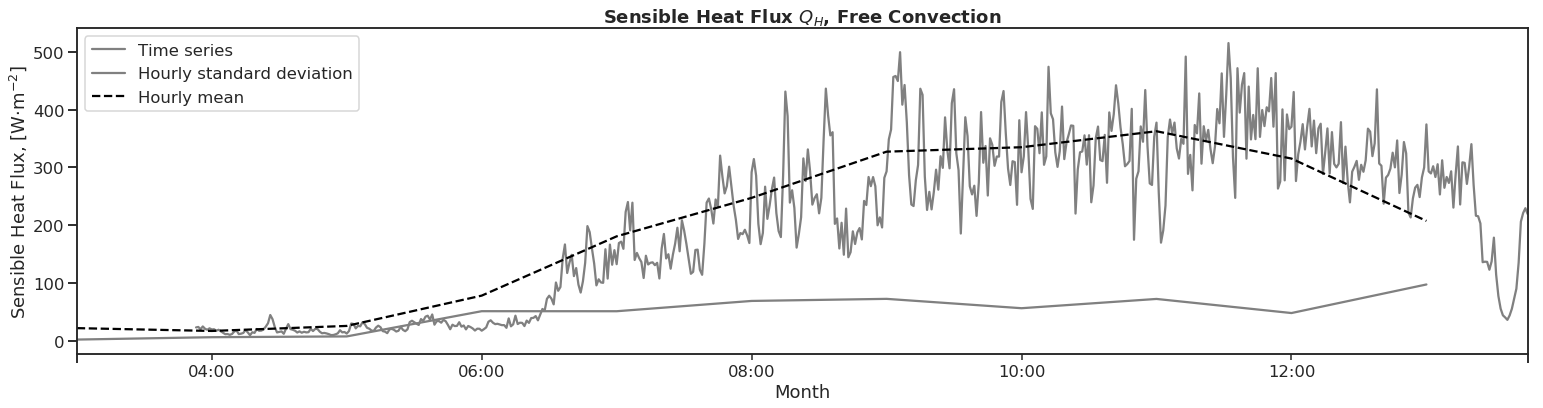

In [4]:
hourly_mean = computed_data.resample("H").mean()
hourly_mean["H_std"] = computed_data["H"].resample("H").std()

plt.figure(figsize=(26, 6))
computed_data["H"].plot(color="grey", label="Time series")
hourly_mean["H_std"].plot(label="Hourly standard deviation", color="grey")
hourly_mean["H"].plot(label="Hourly mean", color="black",
                         linestyle="dashed")

plt.legend(loc="upper left")
plt.title(r"Sensible Heat Flux $Q_{H}$, Free Convection", fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Sensible Heat Flux, [W$\cdot$m$^{-2}$]")
plt.show()

/home/nick/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/home/nick/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/home/nick/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
/home/nick/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


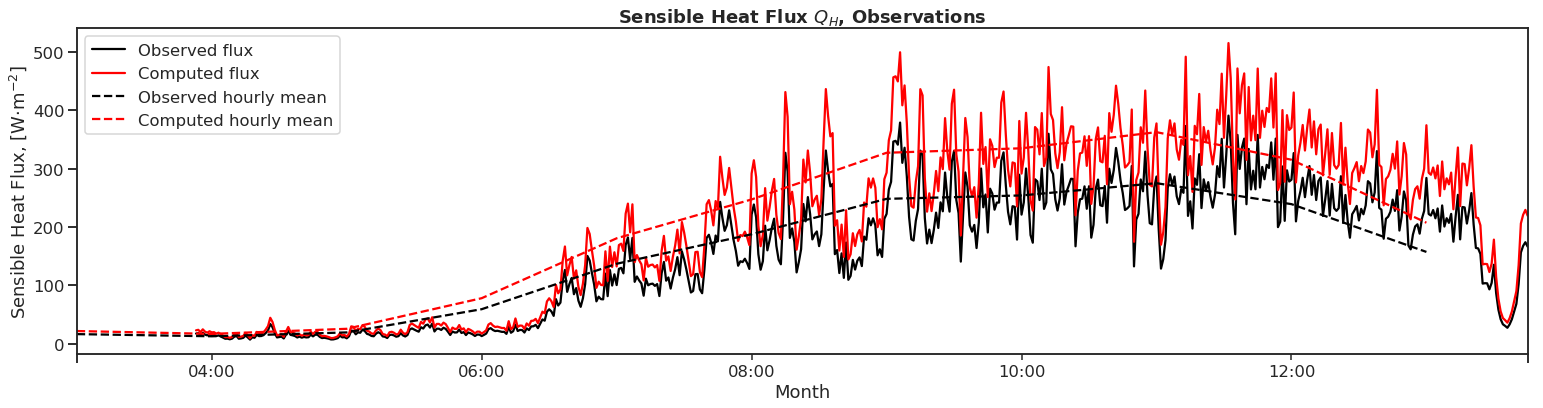

In [5]:
hourly_scint_mean = scint_data.resample("H").mean()
hourly_scint_mean["H_std"] = scint_data["H_convection"].resample("H").std()

plt.figure(figsize=(26, 6))
scint_data["H_convection"].plot(color="black", label="Observed flux")
(computed_data["H"]).plot(color="red", label="Computed flux")

hourly_scint_mean["H_convection"].plot(label="Observed hourly mean", color="black",
                                       linestyle="dashed")
hourly_mean["H"].plot(label="Computed hourly mean", color="red",
                      linestyle="dashed")

plt.legend(loc="upper left")
plt.title(r"Sensible Heat Flux $Q_{H}$, Observations", fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Sensible Heat Flux, [W$\cdot$m$^{-2}$]")
plt.show()